In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../datasets/Linear Regression - Sheet1.csv")
df

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556
...,...,...
295,296,200.555556
296,297,201.222222
297,298,201.888889
298,299,1.888889


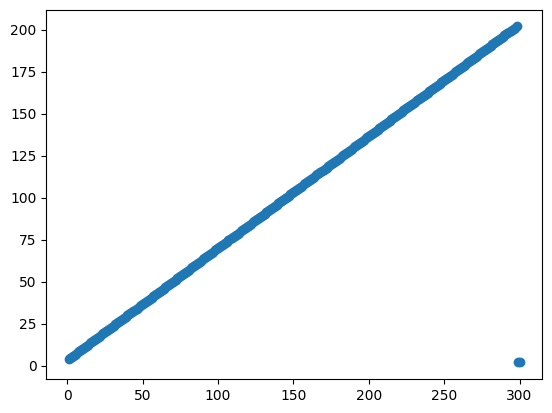

In [3]:
plt.scatter(df["X"], df["Y"])

In [55]:
def split_data(data_frame):
    training, validation, test = np.split(data_frame.sample(frac=1), [int(0.7*len(data_frame)), int(0.8*len(data_frame))])
    return training, validation, test

In [97]:
train, val, test = split_data(df)

In [80]:
def get_xy(data_sample):
    x, y = data_sample["X"], data_sample["Y"]
    x, y = np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1)
    return x, y

In [98]:
x_train, y_train = get_xy(train)
x_val, y_val = get_xy(val)
x_test, y_test = get_xy(test)

In [82]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [83]:
print(linear_model.coef_, linear_model.intercept_)

[[0.6270928]] [7.15808531]


In [84]:
linear_model.score(x_test, y_test)

0.9949361524488323

In [85]:
x_label, y_label = get_xy(df)

In [108]:
def plot_real_predicted(xlabel, predicted, real):
    plt.scatter(xlabel, real, color="blue", label="Real data")
    plt.plot(xlabel, predicted, color="red", label="Predicted")
    plt.legend()
    plt.show()

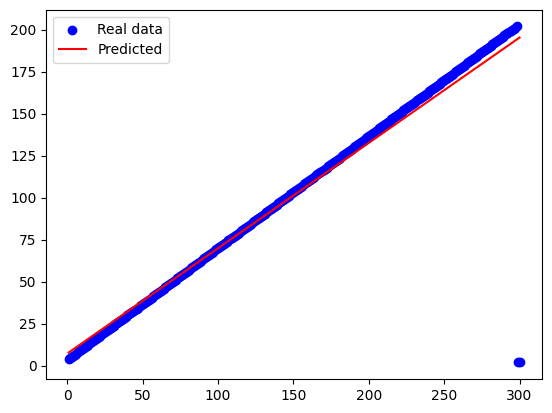

In [109]:
predictions = linear_model.predict(x_label)
plot_real_predicted(x_label, predictions, y_label)

# Regression with a NN

In [87]:
import tensorflow as tf

In [120]:
normalizer = tf.keras.layers.Normalization(input_shape=(1, ), axis=None)
normalizer.adapt(x_label)

In [111]:
linear_NeuralNet = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1)
])

In [112]:
linear_NeuralNet.compile(tf.keras.optimizers.Adam(learning_rate=0.01), loss="mean_squared_error")

In [113]:
history = linear_NeuralNet.fit(x_train, y_train, epochs=500, validation_data=(x_val, y_val), verbose=0)

In [102]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid(True)
    plt.show()

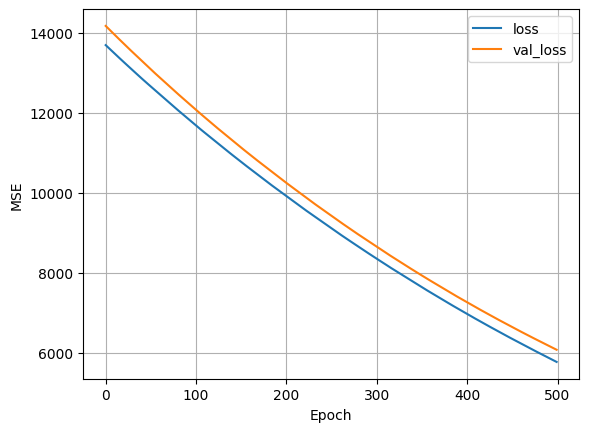

In [114]:
plot_loss(history=history)

10/10 [==============================] - 0s 2ms/step


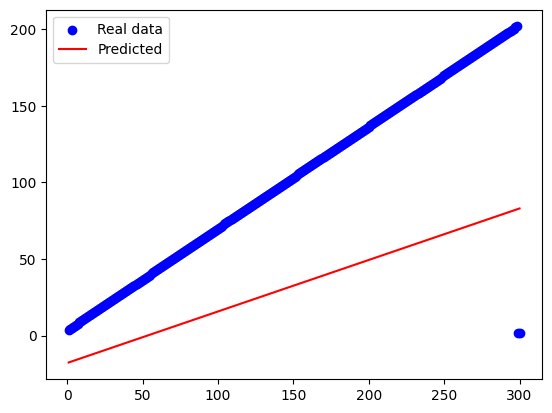

In [115]:
nn_predictions = linear_NeuralNet.predict(x_label)
plot_real_predicted(x_label, nn_predictions, y_label)

# Neural Net

In [127]:
nn_normalizer = tf.keras.layers.Normalization(input_shape=(1, ), axis=None)
nn_normalizer.adapt(x_label)

In [128]:
model = tf.keras.Sequential([
    nn_normalizer,
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='relu'),
])

In [129]:
model.compile(tf.keras.optimizers.Adam(learning_rate=0.01), loss="mean_squared_error")

In [130]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=200, verbose=0)

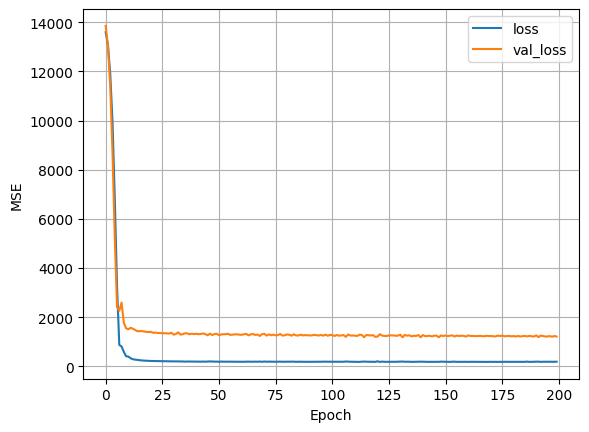

In [131]:
plot_loss(history)

10/10 [==============================] - 0s 2ms/step


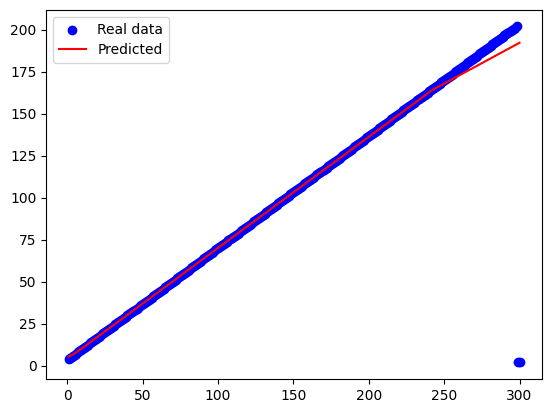

In [135]:
plot_real_predicted(x_label, model.predict(x_label), y_label)

In [136]:
def calculate_MSE(real_data, predicted_data) -> float:
    return (np.square(real_data - predicted_data)).mean()

In [137]:
linear_model_predictions = linear_model.predict(x_label)
nn_linear_model_predictions = linear_NeuralNet.predict(x_label)
Neural_net_predictions = model.predict(x_label)

10/10 [==============================] - 0s 1ms/step


In [138]:
print(f"Standard Linear Model MSE: {calculate_MSE(y_label, linear_model_predictions)}")
print(f"Lienar Neural Network MSE: {calculate_MSE(y_label, nn_linear_model_predictions)}")
print(f"Neural Netowork MSE: {calculate_MSE(y_label, Neural_net_predictions)}")

Standard Linear Model MSE: 263.9503747322745
Lienar Neural Network MSE: 5781.60198594615
Neural Netowork MSE: 248.59492475153326
